In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
datafile = "weather_data.csv"

In [3]:
def get_data(filename):
    df = pd.read_csv(filename)
    X_ = df[["Humidity","Visibility (km)"]]
    Y_ = df[["Temperature (C)"]]
    
    # Spliting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25, random_state=42)

   
    
    return X_train, X_test, y_train, y_test



In [4]:
X_train, X_test, y_train, y_test = get_data(datafile)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72321, 2) (24108, 2) (72321, 1) (24108, 1)


In [5]:
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        #write your code here to retrun batch wise X,y
        yield X[i:min(i + batch_size, num_examples)], y[i:min(i + batch_size, num_examples)] 
    return

In [6]:
#define your batch size
batch_size = 16384

for X, y in data_iter(batch_size, X_test, y_test):
    print(X, '\n', y)
    break

       Humidity  Visibility (km)
25072      0.82            0.643
76967      0.96            0.040
22153      0.90            0.983
38552      0.85            0.056
82925      0.49            0.966
...         ...              ...
81241      0.81            0.871
71517      0.87            0.615
54259      0.91            0.611
35269      0.60            0.700
78799      0.78            1.000

[16384 rows x 2 columns] 
        Temperature (C)
25072         0.563251
76967         0.407837
22153         0.677077
38552         0.276862
82925         0.822798
...                ...
81241         0.330461
71517         0.726038
54259         0.403363
35269         0.635904
78799         0.710960

[16384 rows x 1 columns]


## create and initialize model parameter

In [26]:

def create_model_parameter(mu, sigma, row, column):
    w = np.random.normal(mu, sigma, size=(row, column))
    w = np.transpose(w)
    w.reshape((2,1))
    b = np.zeros(1, dtype=float)
    return w,b

In [36]:
def model(X, w, b):  
    """The linear regression model."""
    # write your code here
    return np.dot(X, w) + b[0]

In [9]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    #write your code here for loss function
    return np.mean(np.square(y_hat - y), axis=0)

In [10]:
def gradient(X, y, y_hat, loss):
    #compute gradeint of loss function with respect to params
    grads = np.array([[(2/len(X))*np.dot((y_hat - y).T, X ).T], [(2/len(X))*np.sum(y_hat - y)]], dtype=object)
    return grads
    

In [41]:
def sgd(w, b, grads, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    #write your code for updating your parameter using gradient descent algorithm
    #Example: theta = theta - (lr * grad)/batch_size
    w[0][0] = w[0][0] - (lr * grads[0][0][0])/batch_size
    w[1][0] = w[1][0] - (lr * grads[0][0][1])/batch_size
    b = b - (lr * np.array([grads[1][0]]))/batch_size
    return w , b
    

In [47]:
def train(lr,num_epochs,X,y, w ,b):
    # write your own code and modify the below code as needed
    loss = np.zeros(num_epochs)
    for epoch in range(num_epochs):
        i=1
        batches = data_iter(batch_size, X, y)
        for X_batch, y_batch in batches:
           y_hat = model(X_batch, w, b)
           loss[epoch] = squared_loss(y_hat, y_batch)
           grads = gradient(X_batch, y_batch, y_hat, loss)
           w, b = sgd(w, b, grads, lr, batch_size)
           #print('batch:' , i , " samlpes:", i*batch_size, " loss:", loss[epoch])
           i += 1
        print("Epoch: ", epoch+1, '\nLoss: ', loss[epoch])
           
        # train_l = squared_loss(net(features, w, b), labels)
        # print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')
    
    return epoch, loss, w, b

In [13]:
def draw_loss(num_epochs,loss):
    plt.plot(num_epochs,loss) 
    plt.ylim(0,0.2)
    plt.show()

In [ ]:
def test(X):
    # write your own code 
    #predict temperature for the given humidity and visibility

In [ ]:
for j in range(0, 10):
    btch = data_iter(batch_size, X_train, y_train)
    for u, o in btch:
        print(type(u))
        print(u, o)
    print("epoch")


In [52]:
LEARNING_RATE = 0.05
EPOCHS = 100000
# for X, y in data_iter(batch_size, X_test, y_test):
#     print("weights", '\n', params[0],'\n', "Bias", '\n', params[1], '\n')
#     y_hat = model(X, params[0], params[1])
#     print('\n','Predictions', '\n', y_hat, '\n')
#     loss = squared_loss(y_hat, y)
#     print("loss", '\n', loss,'\n', "actual", '\n', y)
#     grads = gradient(X, y, y_hat, loss, params)
#     print(grads)
#     break
w, b = create_model_parameter(np.mean(X_train, axis=0), np.std(X_train), 1, 2)
print(w,b)
epoch, loss, w, b = train(LEARNING_RATE, EPOCHS, X_train, y_train, w, b)


[[0.58532787]
 [0.64351104]] [0.]
Epoch:  1 
Loss:  0.12501301393241548
Epoch:  2 
Loss:  0.12500328578755404
Epoch:  3 
Loss:  0.12499355880853058
Epoch:  4 
Loss:  0.12498383299520499
Epoch:  5 
Loss:  0.12497410834743707
Epoch:  6 
Loss:  0.12496438486508671
Epoch:  7 
Loss:  0.12495466254801396
Epoch:  8 
Loss:  0.12494494139607872
Epoch:  9 
Loss:  0.12493522140914085
Epoch:  10 
Loss:  0.12492550258706044
Epoch:  11 
Loss:  0.12491578492969731
Epoch:  12 
Loss:  0.12490606843691172
Epoch:  13 
Loss:  0.12489635310856359
Epoch:  14 
Loss:  0.12488663894451286
Epoch:  15 
Loss:  0.12487692594461969
Epoch:  16 
Loss:  0.1248672141087441
Epoch:  17 
Loss:  0.12485750343674609
Epoch:  18 
Loss:  0.124847793928486
Epoch:  19 
Loss:  0.12483808558382378
Epoch:  20 
Loss:  0.12482837840261961
Epoch:  21 
Loss:  0.12481867238473364
Epoch:  22 
Loss:  0.12480896753002606
Epoch:  23 
Loss:  0.12479926383835697
Epoch:  24 
Loss:  0.12478956130958671
Epoch:  25 
Loss:  0.1247798599435755
Epoc

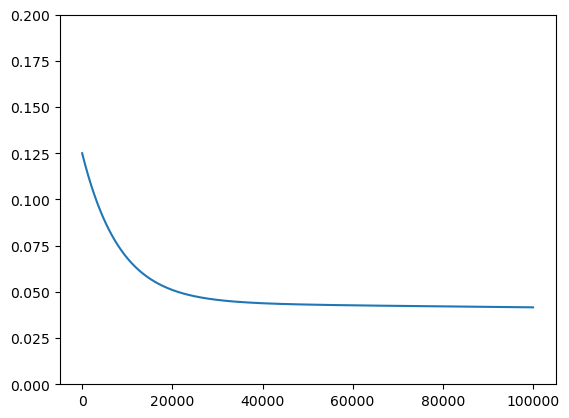

In [53]:
draw_loss(np.array(range(epoch+1))+1, loss)